In [179]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('C:\\Users\\SHUO\\anaconda3\\Lib\\site-packages\\pyspark')

import pyspark
from pyspark.sql import SparkSession
# Initialize Spark session
spark = SparkSession.builder.appName("SDG8 Data Understanding").getOrCreate()

# Load the dataset
data_path = "finaldataset_1.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)
# Display the first few rows of the dataset
df.show()

+--------+------+-------+------------------+-------------------+--------------------+--------------------+----+-------+----+-------------------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+-----------+---------+----------+--------+------+-----+-----+------+----------+---------+---------+------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+-----------+------------------+------------------+------------------+----------+
|exporter|  year|product|        tradevalue|         tradeshare|           expgrowth|       expgrowthTRIM|BANK|BANK_W3|TWIN|                 RZ|                FL|              TANG|              ofagdp|         pcrdbofgdp|            stmktcap|     RecessionAbroad|         GDPgrAbroad|durables|                loss|               loss2|     GDPcap|dev

In [180]:

# Print the schema of the DataFrame
df.printSchema()

# Get summary statistics for numerical columns
df.describe().show()


root
 |-- exporter: string (nullable = true)
 |-- year: double (nullable = true)
 |-- product: integer (nullable = true)
 |-- tradevalue: double (nullable = true)
 |-- tradeshare: double (nullable = true)
 |-- expgrowth: double (nullable = true)
 |-- expgrowthTRIM: double (nullable = true)
 |-- BANK: integer (nullable = true)
 |-- BANK_W3: integer (nullable = true)
 |-- TWIN: integer (nullable = true)
 |-- RZ: double (nullable = true)
 |-- FL: double (nullable = true)
 |-- TANG: double (nullable = true)
 |-- ofagdp: double (nullable = true)
 |-- pcrdbofgdp: double (nullable = true)
 |-- stmktcap: double (nullable = true)
 |-- RecessionAbroad: double (nullable = true)
 |-- GDPgrAbroad: double (nullable = true)
 |-- durables: integer (nullable = true)
 |-- loss: double (nullable = true)
 |-- loss2: double (nullable = true)
 |-- GDPcap: double (nullable = true)
 |-- developed: integer (nullable = true)
 |-- developing: integer (nullable = true)
 |-- blanguar: integer (nullable = true)
 |-

In [181]:
# Check for missing values
for col in df.columns:
    print(col, ":", df.filter(df[col].isNull()).count())


exporter : 0
year : 0
product : 0
tradevalue : 0
tradeshare : 4116
expgrowth : 1992
expgrowthTRIM : 5726
BANK : 108
BANK_W3 : 0
TWIN : 1745
RZ : 1477
FL : 1477
TANG : 1477
ofagdp : 23731
pcrdbofgdp : 1744
stmktcap : 8447
RecessionAbroad : 0
GDPgrAbroad : 0
durables : 0
loss : 0
loss2 : 0
GDPcap : 0
developed : 0
developing : 0
blanguar : 14853
liqsup : 14853
forba : 14853
forbb : 14853
recaps : 14853
debtrelief : 14853
policytot : 14853
recession : 0
GDPgr : 0
INVSA : 1330
CCC : 1330
RZyoung : 2507
rznoncrisis : 1477
caplab : 1477
rd : 1477
homogeneity : 9237
n : 2320
herf : 2320
intout : 2320
contcrisis : 0


In [182]:
# Check for duplicates
print("Number of duplicate rows:", df.count() - df.dropDuplicates().count())

Number of duplicate rows: 0


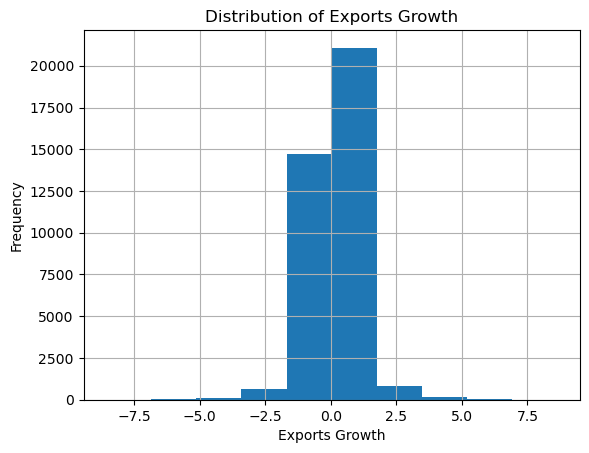

In [183]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas for visualization
df_pandas = df.toPandas()

# Plot distribution of a sample column (e.g., "exports")
df_pandas['expgrowth'].hist()
plt.title('Distribution of Exports Growth')
plt.xlabel('Exports Growth')
plt.ylabel('Frequency')
plt.show()


## Data Preparation

In [184]:
# PySpark code for data selection
drop_cols = ["INVSA", "RZyoung", "caplab", "homogeneitry","herf"]
df = df.drop(*drop_cols)


In [185]:
# remove nan
from pyspark.sql.functions import col, skewness, kurtosis, mean, stddev
# fill the numerical columns with mean value
mean_val = df.agg(mean(df['expgrowth'])).first()[0]
df_cleaned = df.na.fill(mean_val, subset=['expgrowth'])

mean_val = df_cleaned.agg(mean(df['expgrowthTRIM'])).first()[0]
df_cleaned = df_cleaned.na.fill(mean_val, subset=['expgrowthTRIM'])

mean_val = df_cleaned.agg(mean(df['ofagdp'])).first()[0]
df_cleaned = df_cleaned.na.fill(mean_val, subset=['ofagdp'])

mean_val = df_cleaned.agg(mean(df['pcrdbofgdp'])).first()[0]
df_cleaned = df_cleaned.na.fill(mean_val, subset=['pcrdbofgdp'])

mean_val = df_cleaned.agg(mean(df['tradeshare'])).first()[0]
df_cleaned = df_cleaned.na.fill(mean_val, subset=['tradeshare'])

df_cleaned.describe().show()    # check the data

+-------+--------+------------------+-----------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-----------------+-------------------+-------------------+--------------------+------------------+-------------------+-------------------+--------------------+
|summary|exporter|              year|          product|         tradevalue|          tradeshare|          expgrowth|      expgrowthTRIM|                BANK|            BANK_W3|                

In [186]:

# fill the categorical columns with 0

df_cleaned = df_cleaned.na.fill(0)
df_cleaned.show()

+--------+------+-------+------------------+--------------------+--------------------+--------------------+----+-------+----+-------------------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+-----------+---------+----------+--------+------+-----+-----+------+----------+---------+---------+------------+-------------------+-------------------+--------------------+-----------+------------------+------------------+----------+
|exporter|  year|product|        tradevalue|          tradeshare|           expgrowth|       expgrowthTRIM|BANK|BANK_W3|TWIN|                 RZ|                FL|              TANG|              ofagdp|         pcrdbofgdp|            stmktcap|     RecessionAbroad|         GDPgrAbroad|durables|                loss|               loss2|     GDPcap|developed|developing|blanguar|liqsup|forba|forbb|recaps|debtrelief|policytot|

In [187]:
# PySpark code for feature engineering
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("exporter").orderBy("year")

df_constructed = df_cleaned.withColumn("Previous Year Crisis", lag("contcrisis").over(windowSpec))
df_constructed = df_constructed.withColumn("Trade Value Between Products", (col("tradevalue") - lag("tradevalue").over(windowSpec)) / lag("tradevalue").over(windowSpec))
df_constructed = df_constructed.withColumn("valueCrisis",col("contcrisis")*col("tradevalue"))
df_constructed = df_constructed.fillna(0)

In [188]:
df_constructed.show()

+--------+------+-------+------------------+--------------------+--------------------+--------------------+----+-------+----+--------------------+--------------------+-------------------+------------------+------------------+--------+--------------------+--------------------+--------+----+-----+-----------+---------+----------+--------+------+-----+-----+------+----------+---------+---------+------------+-------------------+--------------------+--------------------+-----------+------------------+------------------+----------+--------------------+----------------------------+-----------+
|exporter|  year|product|        tradevalue|          tradeshare|           expgrowth|       expgrowthTRIM|BANK|BANK_W3|TWIN|                  RZ|                  FL|               TANG|            ofagdp|        pcrdbofgdp|stmktcap|     RecessionAbroad|         GDPgrAbroad|durables|loss|loss2|     GDPcap|developed|developing|blanguar|liqsup|forba|forbb|recaps|debtrelief|policytot|recession|       GDPg

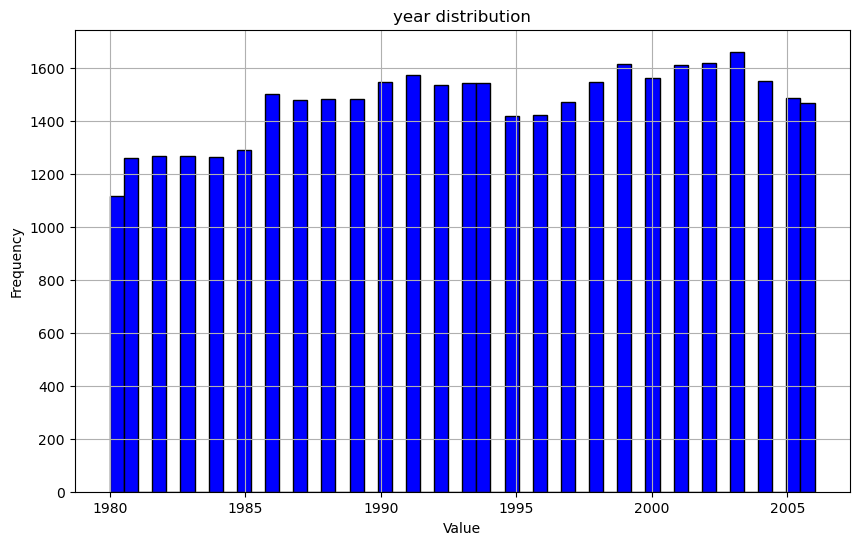

In [189]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame column to a Python list
column_data = df_constructed.select("year").rdd.flatMap(lambda x: x).collect()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(column_data, bins=50, color='blue', edgecolor='black')
plt.title('year distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


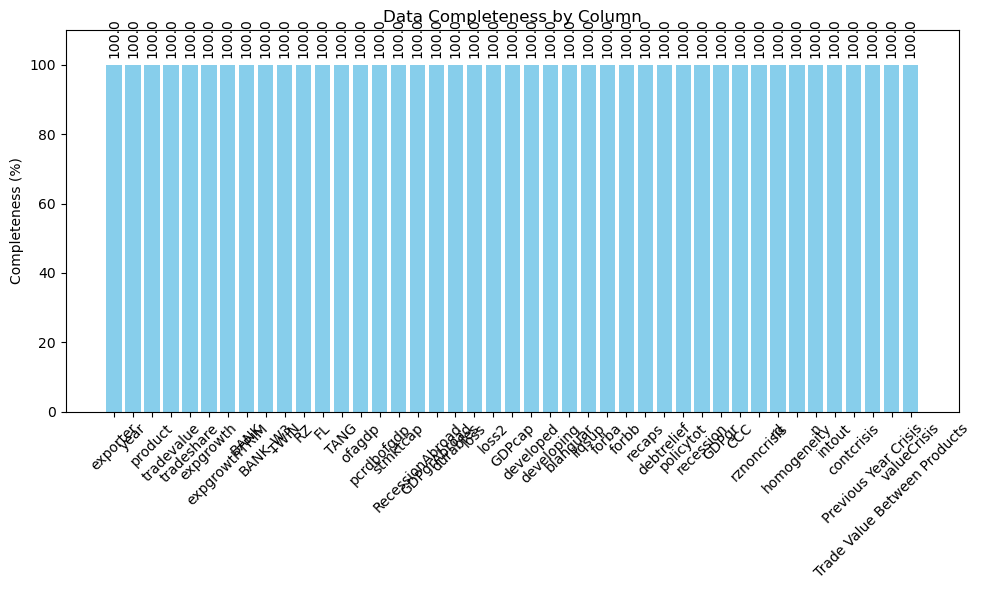

In [190]:
df_constructed_pandas = df_constructed.toPandas()

completeness =df_constructed_pandas.notnull().mean() * 100

# 绘制完整度条形图
plt.figure(figsize=(10, 6))
bars = plt.bar(completeness.index, completeness.values, color='skyblue')

# 标注完整度数据
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom',rotation=90)

plt.ylabel('Completeness (%)')
plt.title('Data Completeness by Column')
plt.xticks(rotation=45)  # 旋转x轴的标签
plt.ylim(0, 110)  # 设置y轴的范围为0到110，以留出空间显示标签
plt.tight_layout()
plt.show()

In [191]:
## data integration
## no need to do this step
## no other data set to integrate

In [192]:
# 3.5 PySpark code for data reformatting 
from pyspark.sql.functions import trim, upper
from pyspark.sql.functions import concat_ws, col,lit
# change the date format
df_formatted = df_constructed.withColumn("year", col("year").cast("int").cast("string"))
df_formatted = df_constructed.withColumn("date_format_year", concat_ws("-", col("year").cast("int").cast("string"), lit("01"), lit("01")))

from pyspark.sql.types import DateType
df = df.withColumn("date_format_year", col("date_format_year").cast(DateType()))
# trimming content

df_formatted = df_formatted.withColumn("expgrowth", upper(trim(df_formatted["expgrowth"])))




AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `date_format_year` cannot be resolved. Did you mean one of the following? [`exporter`, `forba`, `debtrelief`, `developed`, `durables`].;
'Project [exporter#106213, year#106214, product#106215, tradevalue#106216, tradeshare#106217, expgrowth#106218, expgrowthTRIM#106219, BANK#106220, BANK_W3#106221, TWIN#106222, RZ#106223, FL#106224, TANG#106225, ofagdp#106226, pcrdbofgdp#106227, stmktcap#106228, RecessionAbroad#106229, GDPgrAbroad#106230, durables#106231, loss#106232, loss2#106233, GDPcap#106234, developed#106235, developing#106236, ... 17 more fields]
+- Project [exporter#106213, year#106214, product#106215, tradevalue#106216, tradeshare#106217, expgrowth#106218, expgrowthTRIM#106219, BANK#106220, BANK_W3#106221, TWIN#106222, RZ#106223, FL#106224, TANG#106225, ofagdp#106226, pcrdbofgdp#106227, stmktcap#106228, RecessionAbroad#106229, GDPgrAbroad#106230, durables#106231, loss#106232, loss2#106233, GDPcap#106234, developed#106235, developing#106236, ... 16 more fields]
   +- Relation [exporter#106213,year#106214,product#106215,tradevalue#106216,tradeshare#106217,expgrowth#106218,expgrowthTRIM#106219,BANK#106220,BANK_W3#106221,TWIN#106222,RZ#106223,FL#106224,TANG#106225,ofagdp#106226,pcrdbofgdp#106227,stmktcap#106228,RecessionAbroad#106229,GDPgrAbroad#106230,durables#106231,loss#106232,loss2#106233,GDPcap#106234,developed#106235,developing#106236,... 20 more fields] csv


In [ ]:
df_formatted.show()

+--------+------+-------+------------------+--------------------+--------------------+--------------------+----+-------+----+--------------------+--------------------+-------------------+------------------+------------------+--------+--------------------+--------------------+--------+----+-----+-----------+---------+----------+--------+------+-----+-----+------+----------+---------+---------+------------+-------------------+--------------------+--------------------+-----------+------------------+------------------+----------+--------------------+----------------------------+-----------+----------------+
|exporter|  year|product|        tradevalue|          tradeshare|           expgrowth|       expgrowthTRIM|BANK|BANK_W3|TWIN|                  RZ|                  FL|               TANG|            ofagdp|        pcrdbofgdp|stmktcap|     RecessionAbroad|         GDPgrAbroad|durables|loss|loss2|     GDPcap|developed|developing|blanguar|liqsup|forba|forbb|recaps|debtrelief|policytot|rece

In [ ]:

Q1 = df_cleaned.approxQuantile("expgrowth", [0.25], 0.01)[0]
Q3 = df_cleaned.approxQuantile("expgrowth", [0.75], 0.01)[0]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = df_cleaned.filter((col("expgrowth") >= lower_bound) & (col("expgrowth") <= upper_bound))



In [ ]:
from pyspark.sql.functions import when


Q1 = df_cleaned.approxQuantile("expgrowth", [0.01], 0.01)[0]
Q3 = df_cleaned.approxQuantile("expgrowth", [0.99], 0.01)[0]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data2 = df_cleaned.withColumn("expgrowth", when(col("expgrowth") > upper_bound, upper_bound).when(col("expgrowth") < lower_bound, lower_bound).otherwise(col("expgrowth")))


<Axes: ylabel='Frequency'>

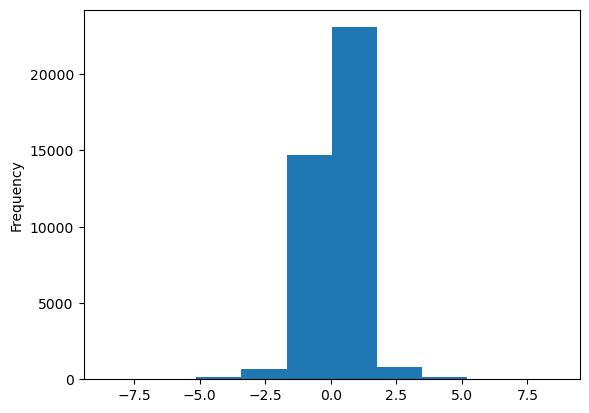

In [ ]:

data1= data2.toPandas()
data1['expgrowth'].plot.hist()

## data reduction

In [197]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

# Define a VectorAssembler to assemble features into a single vector column
feature_cols = [col for col in df_formatted.columns if col not in ["contcrisis", "exporter", "date_format_year"]]  # Assuming "concrisis" is the label column
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = vector_assembler.transform(df_formatted)

# Train a RandomForestClassifier
rf = RandomForestClassifier(featuresCol="features", labelCol="contcrisis", numTrees=100)
rf_model = rf.fit(assembled_df)

# Get feature importance scores
feature_importances = rf_model.featureImportances

# Zip feature names and importance scores
feature_names = feature_cols
feature_importance_scores = feature_importances.toArray().tolist()

# Create a list of (feature_name, importance_score) pairs
feature_importance_pairs = list(zip(feature_names, feature_importance_scores))

# Sort the features by importance in descending order
feature_importance_pairs.sort(key=lambda x: -x[1])

# Print or process the sorted feature importance scores
for feature, importance in feature_importance_pairs:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: valueCrisis, Importance: 0.2663241632978817
Feature: Previous Year Crisis, Importance: 0.2391948024758997
Feature: BANK, Importance: 0.1152970135010671
Feature: blanguar, Importance: 0.11251774698526452
Feature: forbb, Importance: 0.05119913331937774
Feature: policytot, Importance: 0.048162802032315696
Feature: year, Importance: 0.020805091856643896
Feature: liqsup, Importance: 0.0205991314477055
Feature: ofagdp, Importance: 0.018331251820965035
Feature: GDPcap, Importance: 0.01407273554848265
Feature: recaps, Importance: 0.013948517361258631
Feature: GDPgr, Importance: 0.013004094981480252
Feature: stmktcap, Importance: 0.012815481219004348
Feature: loss2, Importance: 0.011724002045660745
Feature: loss, Importance: 0.011385344684069718
Feature: BANK_W3, Importance: 0.010831027375778367
Feature: pcrdbofgdp, Importance: 0.009216625918010476
Feature: recession, Importance: 0.0019371997037796354
Feature: forba, Importance: 0.0018313472210300618
Feature: developed, Importance: 0.0

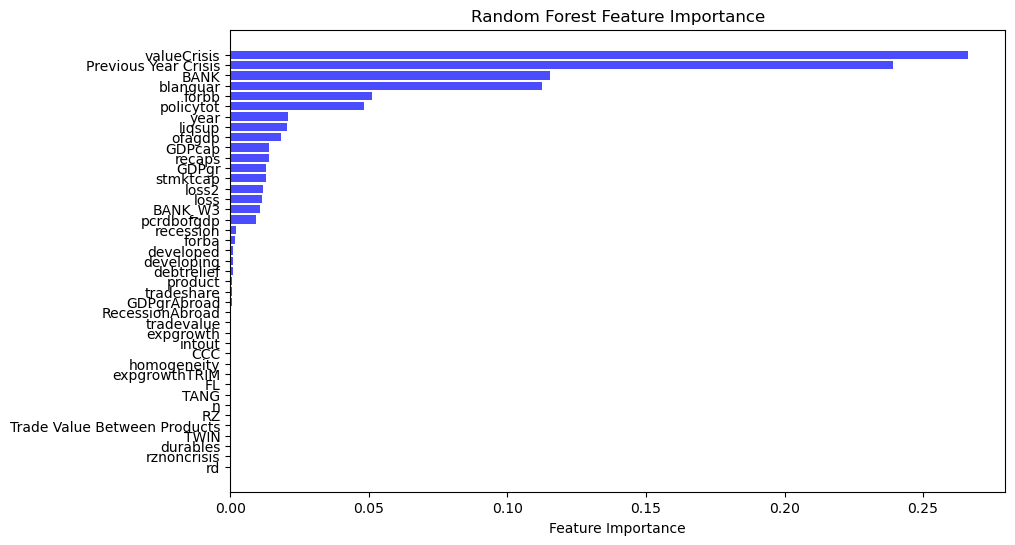

In [198]:
import matplotlib.pyplot as plt

# 特征名称和重要性得分
feature_names, feature_importance_scores = zip(*feature_importance_pairs)

# 创建一个水平柱状图
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_scores, color='b', alpha=0.7)

# 添加标题和标签
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

# 倒转y轴以使最重要的特征显示在顶部
plt.gca().invert_yaxis()

# 显示图
plt.show()


In [207]:

threshold = 0.005 

# select features with importance greater than threshold
selected_features = [feature for feature, importance in feature_importance_pairs if importance > threshold]
selected_features = selected_features + ["contcrisis","exporter","date_format_year"]

df_reduced = df_formatted.select(selected_features)  



In [208]:
df_reduced.describe().show()
# no need to reduce the duplicated data

+-------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+------------------+--------------------+------------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------+----------------+
|summary|        valueCrisis|Previous Year Crisis|                BANK|            blanguar|               forbb|          policytot|              year|              liqsup|              ofagdp|            GDPcap|              recaps|             GDPgr|           stmktcap|               loss2|                loss|            BANK_W3|         pcrdbofgdp|          contcrisis|exporter|date_format_year|
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+

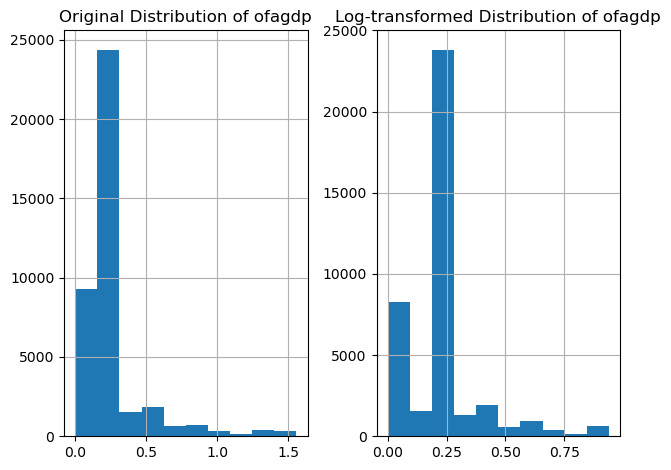

In [211]:
from pyspark.sql.functions import log

# Apply log transformation to the 'Exports' column
df_transformed = df_reduced.withColumn("Log_ofagdp", log(df_reduced["ofagdp"] + 1))  # Adding 1 to handle zeros

# Optionally, visualize the distribution before and after transformation
df_pandas = df_transformed.toPandas()

import matplotlib.pyplot as plt

# Original distribution
plt.subplot(1, 2, 1)
df_pandas['ofagdp'].hist()
plt.title('Original Distribution of ofagdp')

# After log transformation
plt.subplot(1, 2, 2)
df_pandas['Log_ofagdp'].hist()
plt.title('Log-transformed Distribution of ofagdp')

plt.tight_layout()
plt.show()


In [212]:
# Assuming 'data' is your DataFrame
train, validation, test = df_reduced.randomSplit([0.6, 0.2, 0.2], seed=722)


In [220]:
df_reduced.columns

['valueCrisis',
 'Previous Year Crisis',
 'BANK',
 'blanguar',
 'forbb',
 'policytot',
 'year',
 'liqsup',
 'ofagdp',
 'GDPcap',
 'recaps',
 'GDPgr',
 'stmktcap',
 'loss2',
 'loss',
 'BANK_W3',
 'pcrdbofgdp',
 'contcrisis',
 'exporter',
 'date_format_year']

In [236]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Assuming "concrisis" is the label column
label_col = "contcrisis"

# Select feature columns
feature_cols = [col for col in df_reduced.columns if col not in [label_col, "exporter", "date_format_year"]]


# Initialize the VectorAssembler
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Transform the data
assembled_data = vec_assembler.transform(df_reduced)
train_data, test_data = assembled_data.randomSplit([0.7, 0.3], seed=42)





Area Under ROC: 1.0


In [237]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler



# Use KMeans clustering
kmeans = KMeans().setK(3).setSeed(722)
model = kmeans.fit(assembled_data)
predictions = model.transform(assembled_data)


In [254]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Convert target column to index
indexer = StringIndexer(inputCol="contcrisis", outputCol="label").fit(train_data)
data = indexer.transform(train_data)


# Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
model = rf.fit(data)
predictions = model.transform(data)


In [261]:
model.summary.predictions.show()

+-----------+--------------------+----+--------+-----+---------+------+------+--------------------+-----------+------+-----------+------------------+-----+----+-------+-------------------+----------+--------+----------------+--------------------+-----+--------------------+--------------------+----------+
|valueCrisis|Previous Year Crisis|BANK|blanguar|forbb|policytot|  year|liqsup|              ofagdp|     GDPcap|recaps|      GDPgr|          stmktcap|loss2|loss|BANK_W3|         pcrdbofgdp|contcrisis|exporter|date_format_year|            features|label|       rawPrediction|         probability|prediction|
+-----------+--------------------+----+--------+-----+---------+------+------+--------------------+-----------+------+-----------+------------------+-----+----+-------+-------------------+----------+--------+----------------+--------------------+-----+--------------------+--------------------+----------+
|        0.0|                   0|   0|       0|    0|        0|1980.0|     0|0.01

In [252]:
cluster_centers = model.clusterCenters()

for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} center: {center}")
    

Cluster 0 center: [6.67751304e+03 1.88712611e-02 4.39824171e-02 1.58649960e-02
 1.98312449e-02 6.52031124e-02 1.99352840e+03 1.37934519e-02
 3.02438854e-01 1.04543475e+04 7.90723525e-03 3.43081181e+00
 3.46338140e-01 5.44437770e-04 5.65156015e-03 1.28309418e-01
 6.28357126e-01]
Cluster 1 center: [ 3.51774243e+07  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  4.00000000e+00  1.99200000e+03  1.00000000e+00
  3.02438854e-01  3.46286107e+04  1.00000000e+00  9.72053707e-01
  7.37696588e-01 -3.84601057e-02 -2.11090203e-02  1.00000000e+00
  1.74318600e+00]
Cluster 2 center: [ 7.66933437e+07  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  4.00000000e+00  1.99200000e+03  1.00000000e+00
  3.02438854e-01  3.46286107e+04  1.00000000e+00  9.72053707e-01
  7.37696588e-01 -3.84601057e-02 -2.11090203e-02  1.00000000e+00
  1.74318600e+00]


In [263]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

# Assuming your dataframe is named 'df' and has a column 'features' that is a vector of your 17 features
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(assembled_data)
result = model.transform(assembled_data).select("pcaFeatures")

In [266]:
result.show(truncate=False)

+--------------------------------------+
|pcaFeatures                           |
+--------------------------------------+
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
|[-5.183156322219035,7550.883612444392]|
+--------------------------------------+
only showing top

In [268]:
result = result.toPandas()




AttributeError: 'DataFrame' object has no attribute 'toPandas'

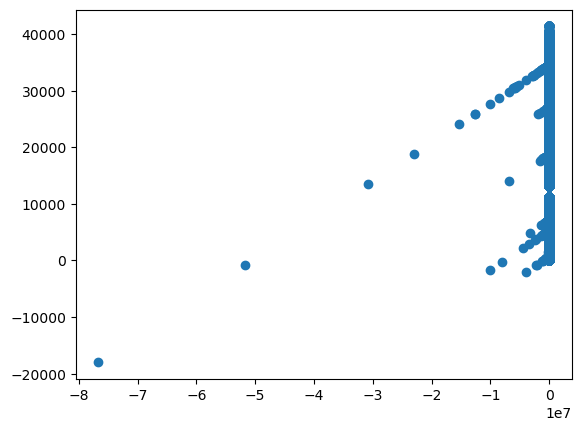

: 

In [269]:
plt.scatter(result['pcaFeatures'].apply(lambda x: x[0]), result['pcaFeatures'].apply(lambda x: x[1]))

top 5 most important:
GDPgrAbroad
GDPcap
pcrdbofgdp
tradevalue
tradeshare

In [264]:
import matplotlib.pyplot as plt

# Extract x and y values
x = [row['pca_x'] for row in pca_result]
y = [row['pca_y'] for row in pca_result]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('2D PCA of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

AnalysisException: [INVALID_EXTRACT_BASE_FIELD_TYPE] Can't extract a value from "pcaFeatures". Need a complex type [STRUCT, ARRAY, MAP] but got "STRUCT<type: TINYINT, size: INT, indices: ARRAY<INT>, values: ARRAY<DOUBLE>>".

In [ ]:
# Feature importance
importances = rf_model.featureImportances
feature_list = ["your_feature_columns_here"]
sorted_importances = sorted([(feature, importance) for feature, importance in zip(feature_list, importances)], key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")


In [ ]:
from pyspark.sql.functions import when, col, array

# 假设你有一个名为 'df' 的DataFrame
# 你可以用你的DataFrame的名称替换 'df'

# 创建一个UDF（用户自定义函数）来遍历每一行，将列名添加到数组中
def collect_columns_with_value_1(*cols):
    result = []
    for i, col_name in enumerate(cols):
        if cols[i] == 1:
            result.append(col_name)
    return result

# 注册UDF以便在DataFrame中使用
spark.udf.register("collect_columns_with_value_1", collect_columns_with_value_1)

# 遍历每一行，将列名添加到名为 'selected_columns' 的新列中
df_with_selected_columns = df.withColumn("selected_columns", expr("collect_columns_with_value_1(*)"))

# 打印DataFrame
df_with_selected_columns.show(truncate=False)

In [260]:
from pyspark.sql.functions import when, collect_list, array

# Create the 'items' column based on the condition
for col in df_constructed.columns:
    df_constructed = df_constructed.withColumn(col, when(str(df_constructed[col]) == '1', col).otherwise(None))

apri_data = df_constructed.withColumn("items", array([col for col in df_constructed if col != 'items']))

# Now, you can use any Apriori implementation that accepts this format


PySparkTypeError: [NOT_COLUMN] Argument `condition` should be a Column, got bool.

In [243]:
from pyspark.ml.fpm import FPGrowth

fpGrowth = FPGrowth(itemsCol="features", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(train_data)
model.freqItemsets.show()
model.associationRules.show()


IllegalArgumentException: requirement failed: The input column must be array, but got struct<type:tinyint,size:int,indices:array<int>,values:array<double>>.

In [249]:
from pyspark.sql import functions as F

aggregated_data = df_constructed.groupBy("exporter","product").agg(F.sum("tradevalue").alias("sum_tradevalue"))




In [251]:
import statsmodels.api as sm

ts_model = sm.tsa.ARIMA(aggregated_data['sum_tradevalue'], order=(1,1,1))
results = ts_model.fit()

TypeError: object of type 'Column' has no len()